In [367]:
import pandas as pd
import seaborn as sns
import re
import os

# standard count of files in the folder. 
def count_files_in_directory(directory_path):
    try:
        # List all the files and directories in the given directory
        items = os.listdir(directory_path)
        
        # Filter out directories, keeping only files
        files = [item for item in items if os.path.isfile(os.path.join(directory_path, item))]
        
        # Return the number of files
        return len(files)
    
    except FileNotFoundError:
        return "Directory not found"
    except Exception as e:
        return f"An error occurred: {e}"

# using the function
directory_path = 'C:/stats_research/data_llm-for-cpu/stats'
file_count = count_files_in_directory(directory_path)

# Dictionary to hold the data
data = {}


for i in range(1, file_count + 1):
    file_path = f'C:/stats_research/data_llm-for-cpu/stats/stats_00{i}.txt'
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Grabbing keys to use in the dictionary
        for line in lines:
            parts = line.split()
            
            if len(parts) < 2:
                continue
            
            key = parts[0]
            if "inst" in key or "Inst" in key:
                value = float(parts[1])

                if key in data:
                    data[key].append(value)
                else:
                    data[key] = [value]

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading {file_path}: {e}")

# creation of pandas dataframe
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

print(df.head())


    simInsts  hostInstRate  system.cpu.exec_context.thread_0.numInsts  \
0  2081696.0     1316213.0                                  2081696.0   
1  2081647.0     1352445.0                                  2081647.0   
2  2081571.0     1254327.0                                  2081571.0   

   system.cpu.exec_context.thread_0.numCondCtrlInsts  \
0                                           347568.0   
1                                           347559.0   
2                                           347550.0   

   system.cpu.exec_context.thread_0.numIntInsts  \
0                                     3548176.0   
1                                     3548092.0   
2                                     3547946.0   

   system.cpu.exec_context.thread_0.numFpInsts  \
0                                       9003.0   
1                                       9003.0   
2                                       9015.0   

   system.cpu.exec_context.thread_0.numVecInsts  \
0                        

In [368]:
# just checking if the head actually works 
df.head(100000)

,simInsts,hostInstRate,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,system.cpu.exec_context.thread_0.statExecutedInstType::No_OpClass,system.cpu.exec_context.thread_0.statExecutedInstType::IntAlu,system.cpu.exec_context.thread_0.statExecutedInstType::IntMult,system.cpu.exec_context.thread_0.statExecutedInstType::IntDiv,system.cpu.exec_context.thread_0.statExecutedInstType::FloatAdd,system.cpu.exec_context.thread_0.statExecutedInstType::FloatCmp,system.cpu.exec_context.thread_0.statExecutedInstType::FloatCvt,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMult,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::FloatDiv,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMisc,system.cpu.exec_context.thread_0.statExecutedInstType::FloatSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAddAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdCvt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMisc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMult,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShift,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShiftAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdDiv,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatCvt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatDiv,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMisc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMult,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatReduceAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatReduceCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAes,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAesMix,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha1Hash,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha1Hash2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha256Hash,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha256Hash2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShaSigma2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShaSigma3,system.cpu.exec_context.thread_0.statExecutedInstType::SimdPredAlu,system.cpu.exec_context.thread_0.statExecutedInstType::MemRead,system.cpu.exec_context.thread_0.statExecutedInstType::MemWrite,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMemRead,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMemWrite,system.cpu.exec_context.thread_0.statExecutedInstType::IprAccess,system.cpu.exec_context.thread_0.statExecutedInstType::InstPrefetch,system.cpu.exec_context.thread_0.statExecutedInstType::total,system.cpu.thread_0.numInsts,system.mem_ctrl.dram.bytesRead::cpu.inst

In [369]:
# because there is no need for more padding (seems like every value is covered), check for missing values and remove/fill them
df.fillna(0, inplace=True)
# df = df.drop(df.columns[0], axis=1)
missing_values = df.isnull().sum()
print(missing_values)

simInsts                                             0
hostInstRate                                         0
system.cpu.exec_context.thread_0.numInsts            0
system.cpu.exec_context.thread_0.numCondCtrlInsts    0
system.cpu.exec_context.thread_0.numIntInsts         0
                                                    ..
system.mem_ctrl.dram.bwInstRead::cpu.inst            0
system.mem_ctrl.dram.bwInstRead::total               0
system.mem_ctrl.dram.bwTotal::cpu.inst               0
system.workload.inst.arm                             0
system.workload.inst.quiesce                         0
Length: 74, dtype: int64


In [370]:
df.to_csv("review.csv", sep=',', index=False)
df.head()


,simInsts,hostInstRate,system.cpu.exec_context.thread_0.numInsts,system.cpu.exec_context.thread_0.numCondCtrlInsts,system.cpu.exec_context.thread_0.numIntInsts,system.cpu.exec_context.thread_0.numFpInsts,system.cpu.exec_context.thread_0.numVecInsts,system.cpu.exec_context.thread_0.numLoadInsts,system.cpu.exec_context.thread_0.numStoreInsts,system.cpu.exec_context.thread_0.statExecutedInstType::No_OpClass,system.cpu.exec_context.thread_0.statExecutedInstType::IntAlu,system.cpu.exec_context.thread_0.statExecutedInstType::IntMult,system.cpu.exec_context.thread_0.statExecutedInstType::IntDiv,system.cpu.exec_context.thread_0.statExecutedInstType::FloatAdd,system.cpu.exec_context.thread_0.statExecutedInstType::FloatCmp,system.cpu.exec_context.thread_0.statExecutedInstType::FloatCvt,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMult,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::FloatDiv,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMisc,system.cpu.exec_context.thread_0.statExecutedInstType::FloatSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAddAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdCvt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMisc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMult,system.cpu.exec_context.thread_0.statExecutedInstType::SimdMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShift,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShiftAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdDiv,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatCvt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatDiv,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMisc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMult,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatMultAcc,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatSqrt,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceAlu,system.cpu.exec_context.thread_0.statExecutedInstType::SimdReduceCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatReduceAdd,system.cpu.exec_context.thread_0.statExecutedInstType::SimdFloatReduceCmp,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAes,system.cpu.exec_context.thread_0.statExecutedInstType::SimdAesMix,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha1Hash,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha1Hash2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha256Hash,system.cpu.exec_context.thread_0.statExecutedInstType::SimdSha256Hash2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShaSigma2,system.cpu.exec_context.thread_0.statExecutedInstType::SimdShaSigma3,system.cpu.exec_context.thread_0.statExecutedInstType::SimdPredAlu,system.cpu.exec_context.thread_0.statExecutedInstType::MemRead,system.cpu.exec_context.thread_0.statExecutedInstType::MemWrite,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMemRead,system.cpu.exec_context.thread_0.statExecutedInstType::FloatMemWrite,system.cpu.exec_context.thread_0.statExecutedInstType::IprAccess,system.cpu.exec_context.thread_0.statExecutedInstType::InstPrefetch,system.cpu.exec_context.thread_0.statExecutedInstType::total,system.cpu.thread_0.numInsts,system.mem_ctrl.dram.bytesRead::cpu.inst

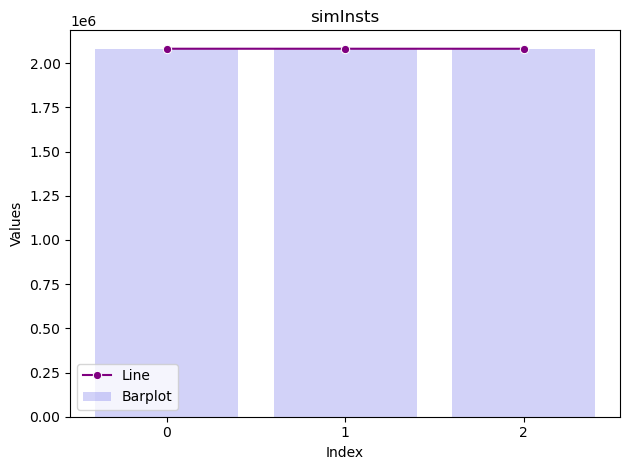

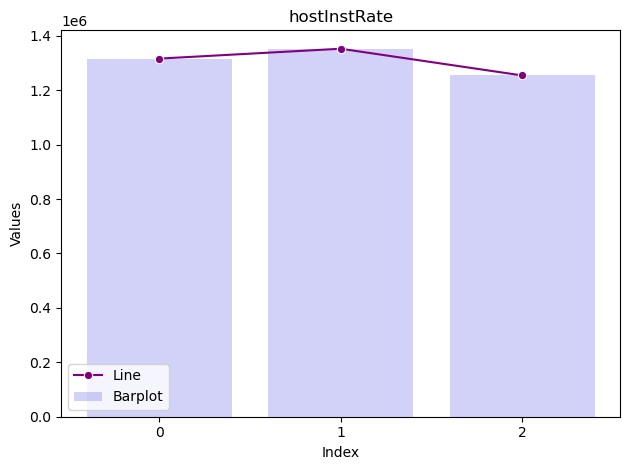

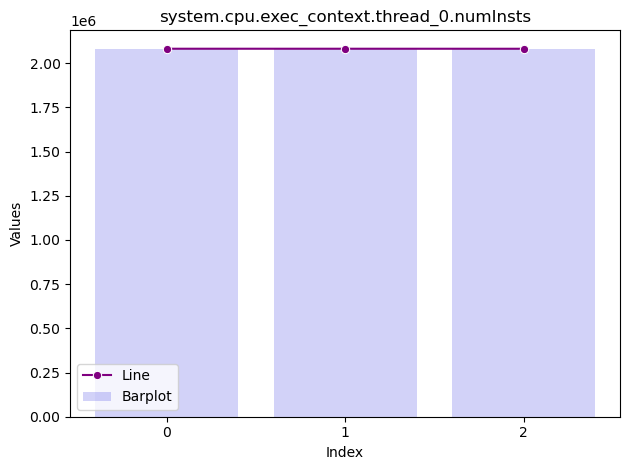

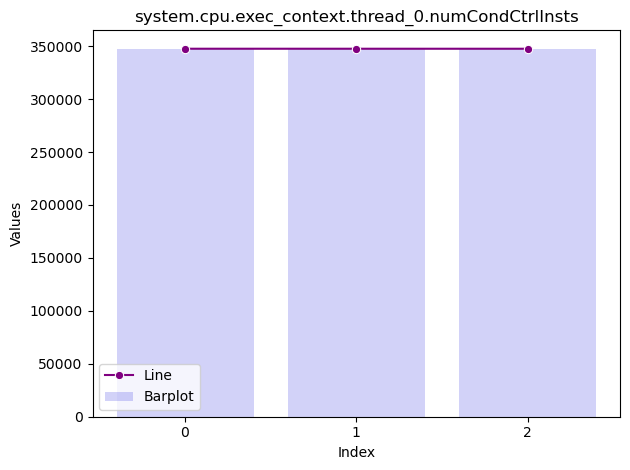

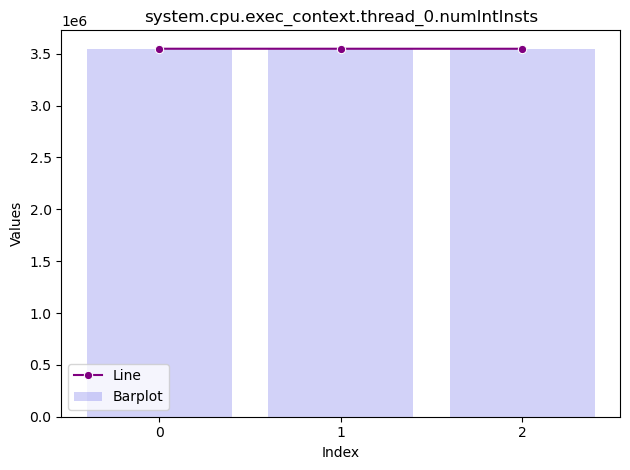

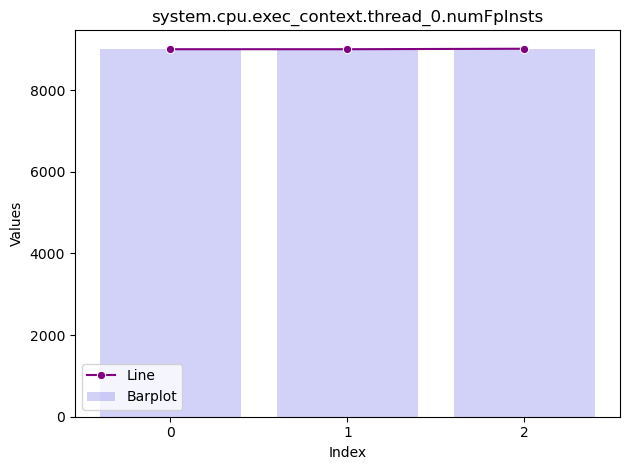

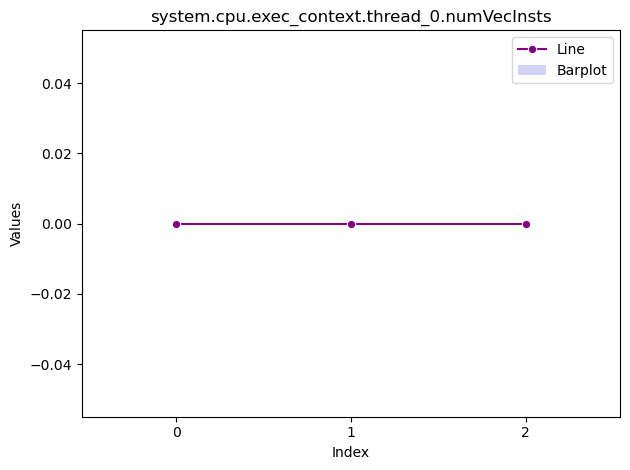

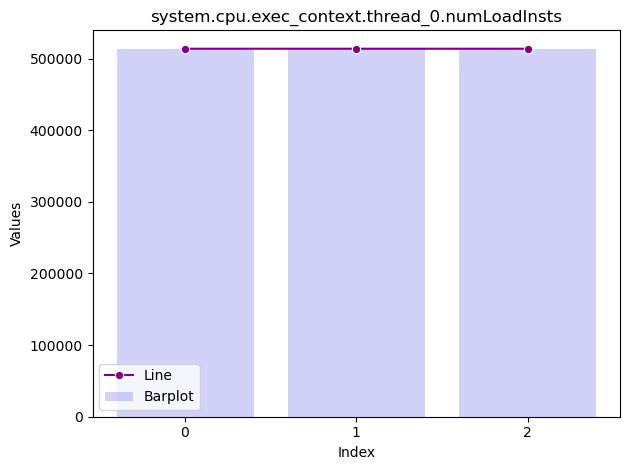

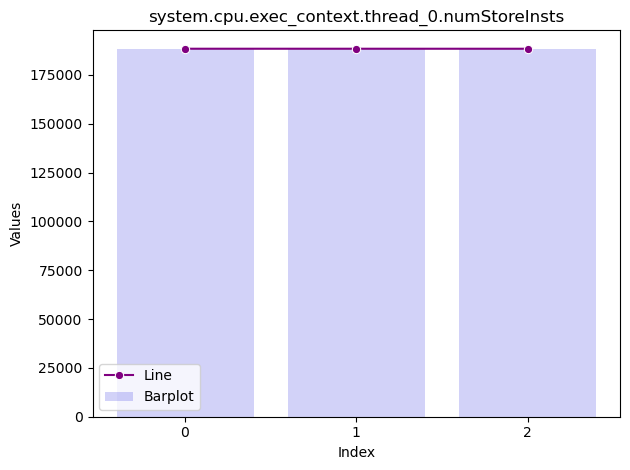

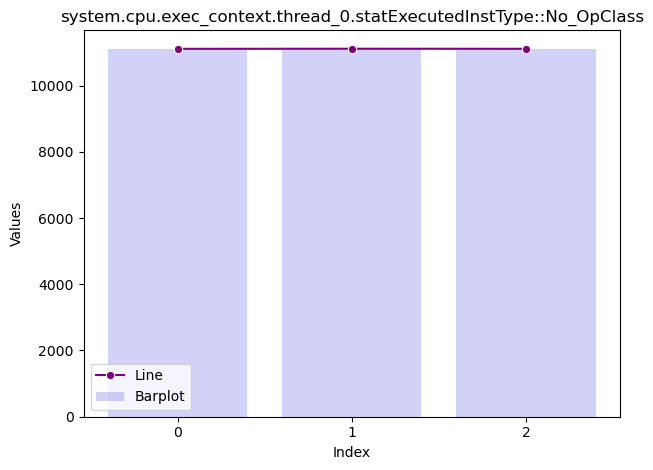

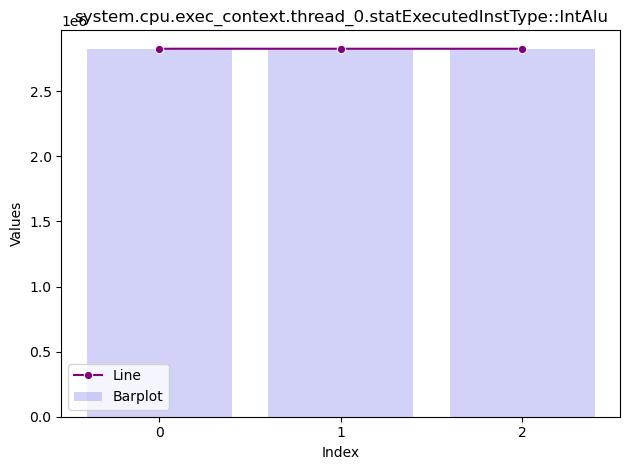

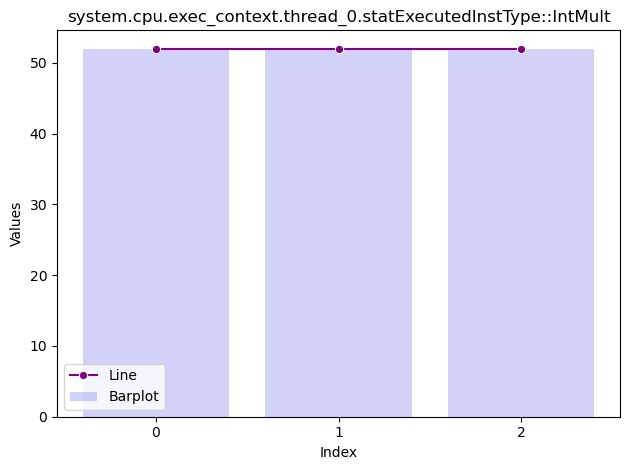

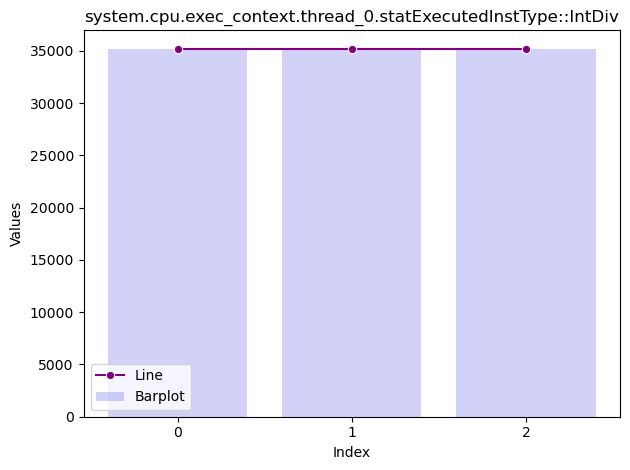

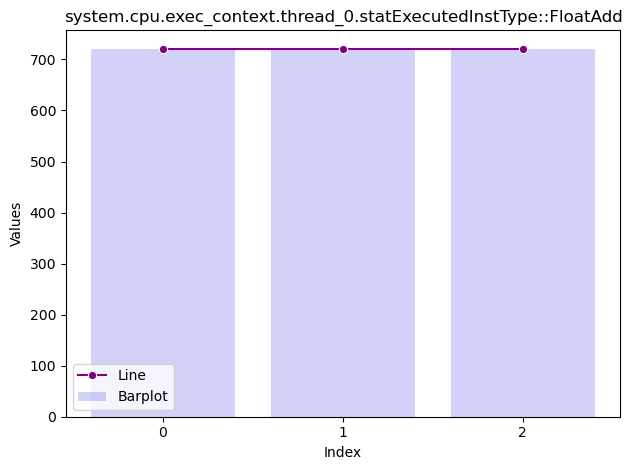

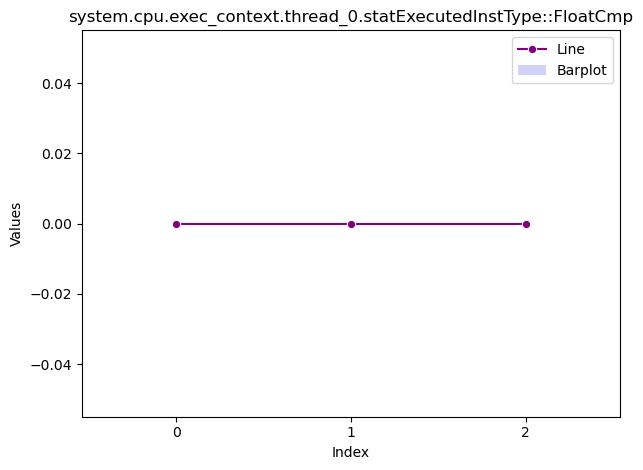

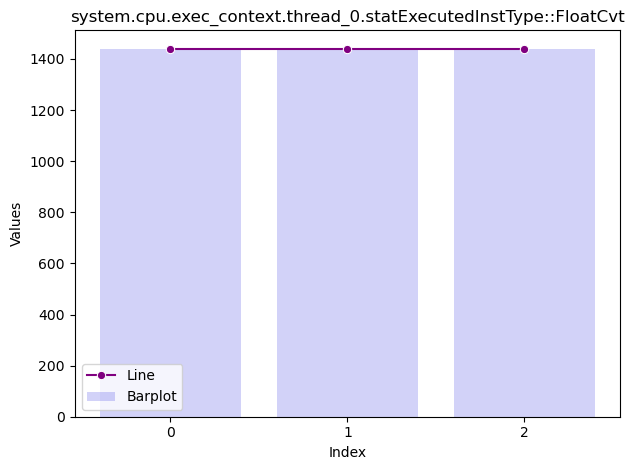

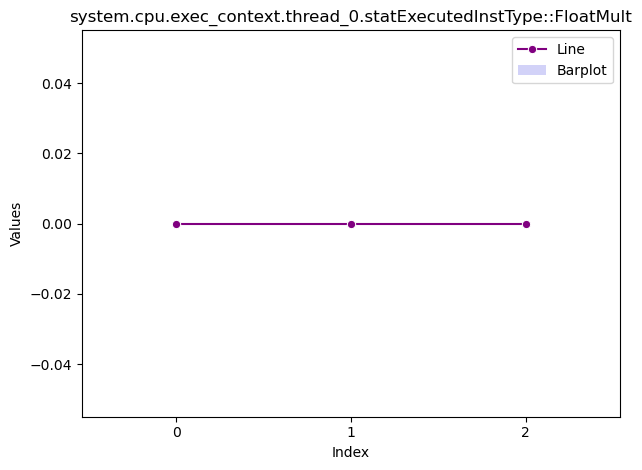

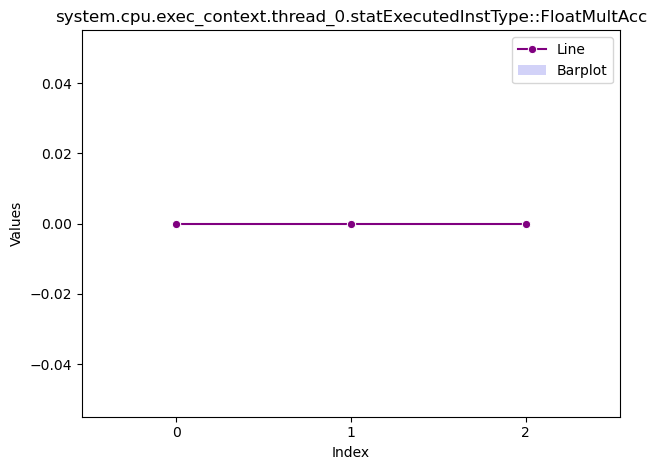

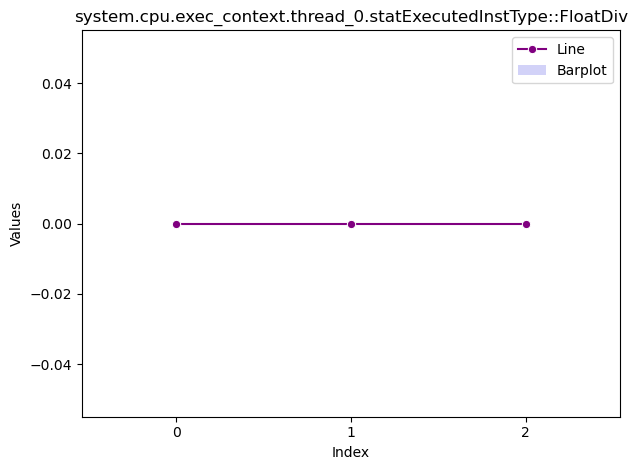

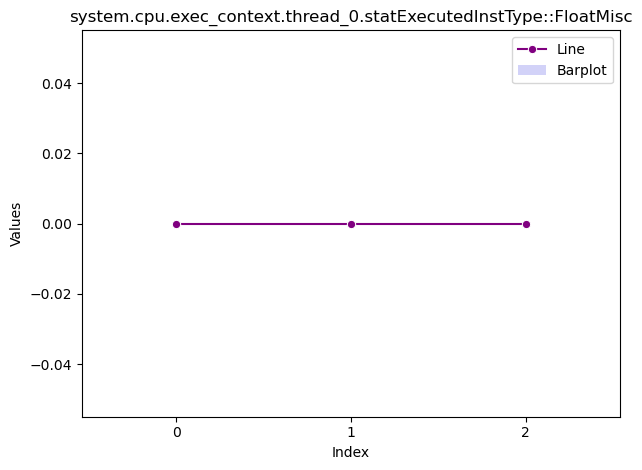

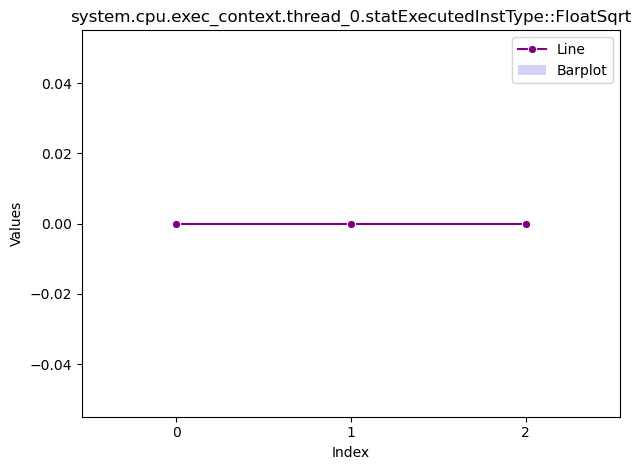

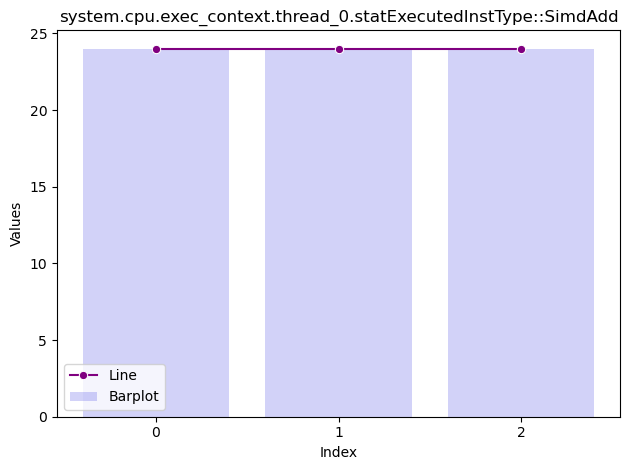

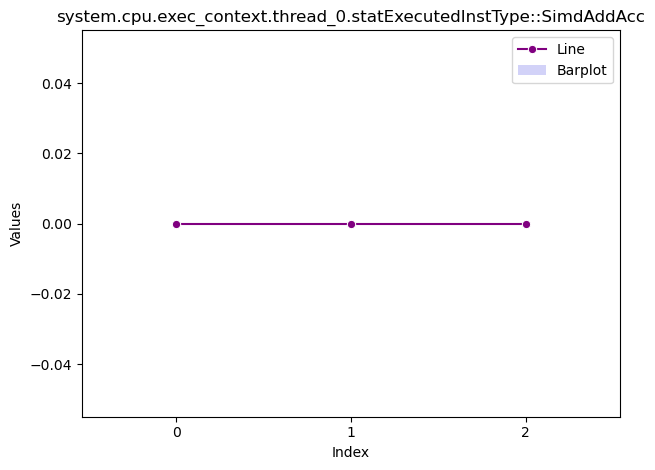

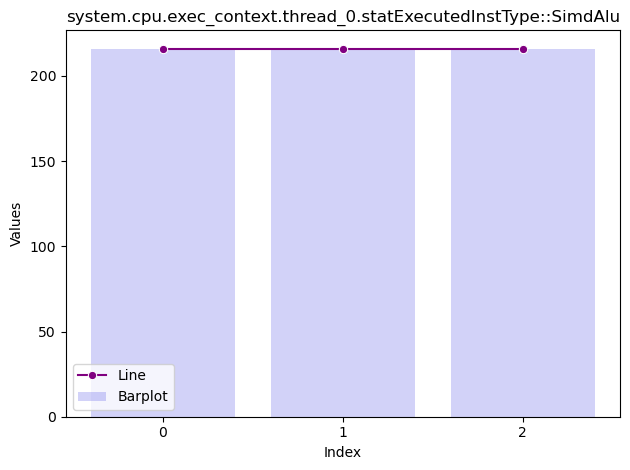

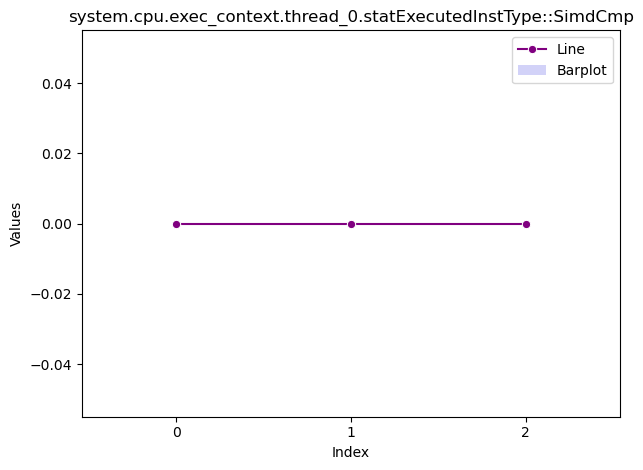

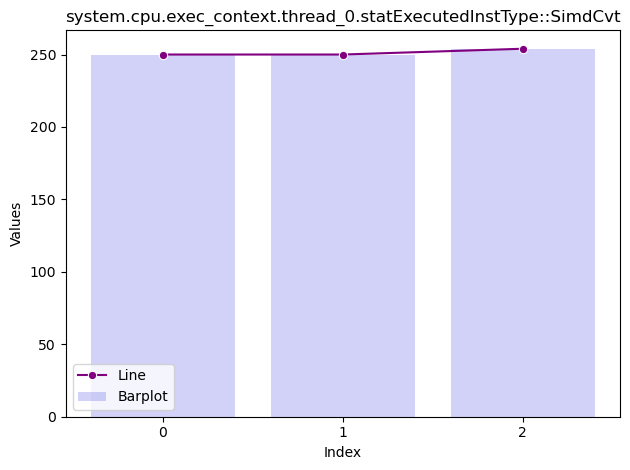

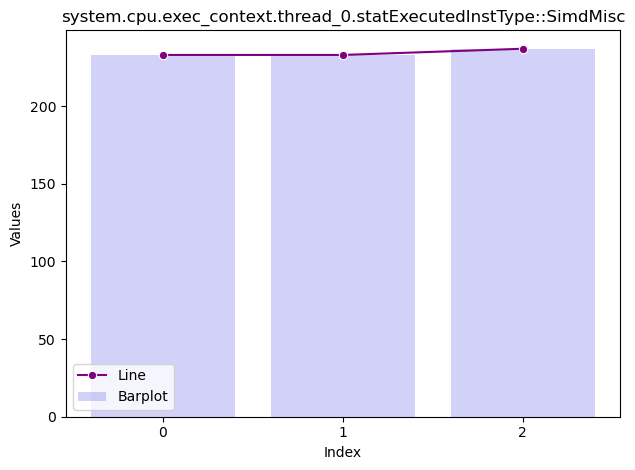

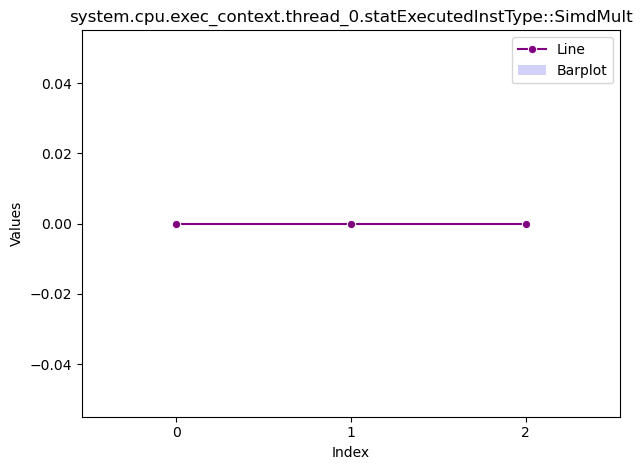

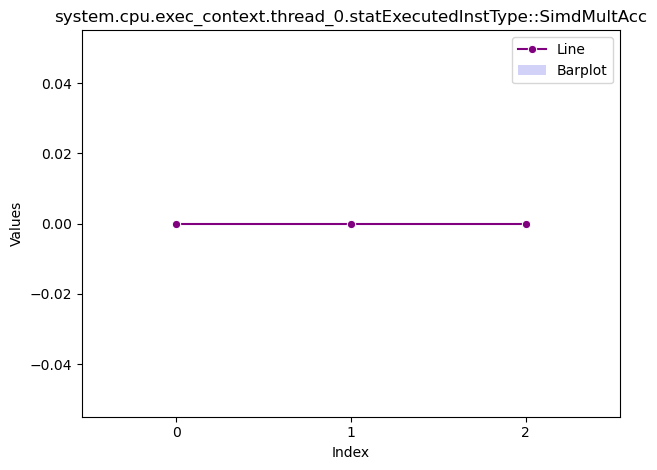

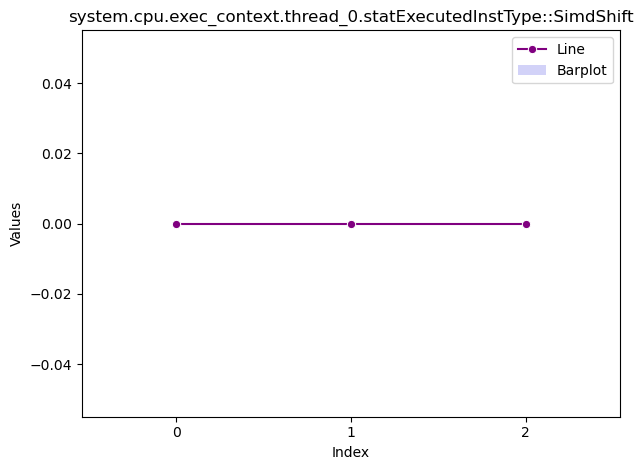

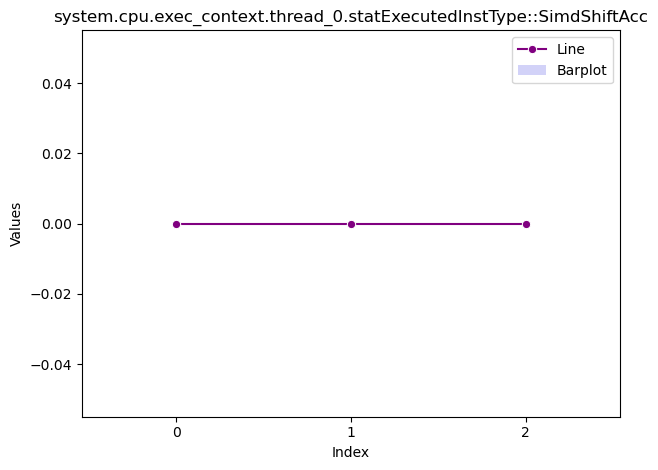

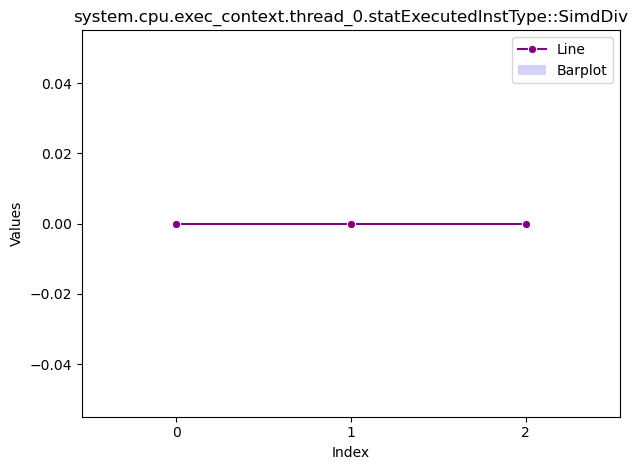

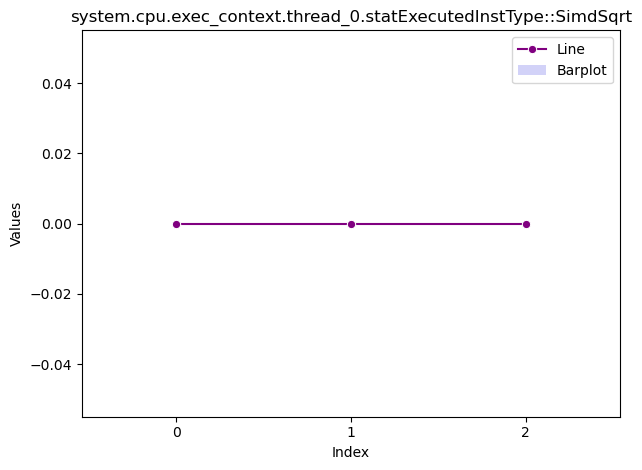

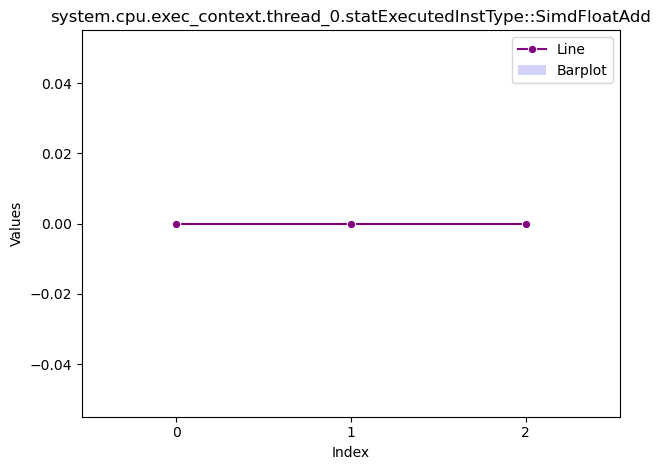

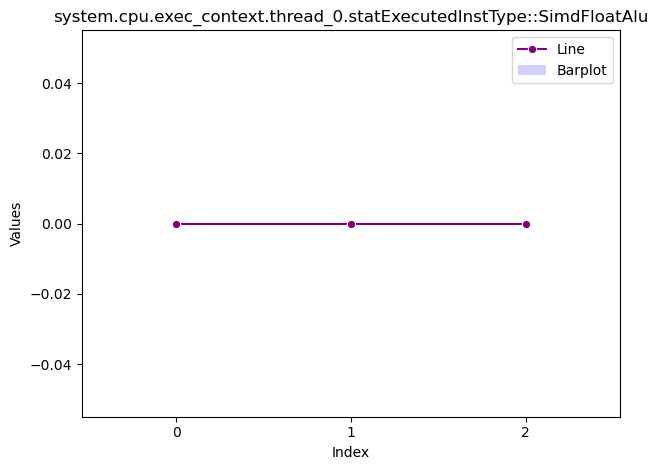

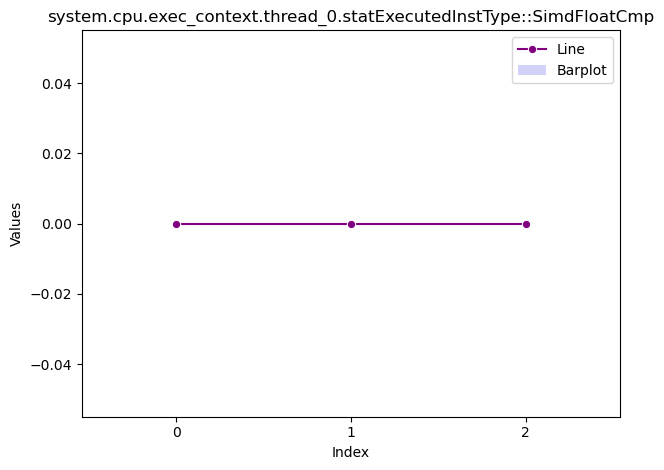

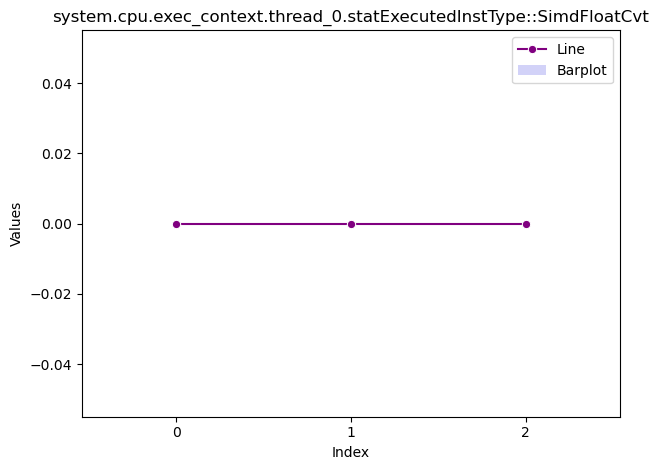

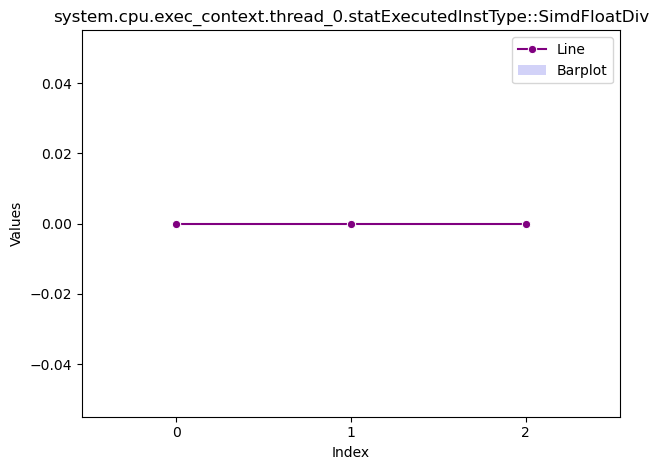

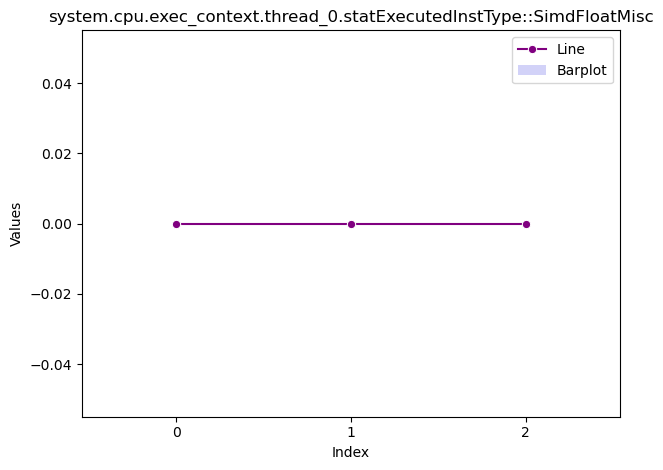

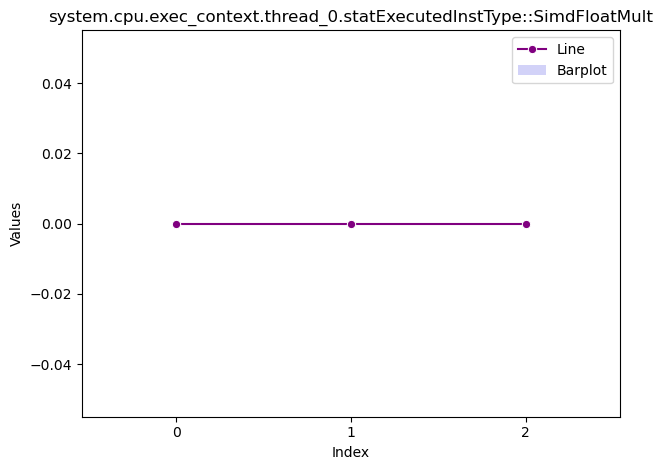

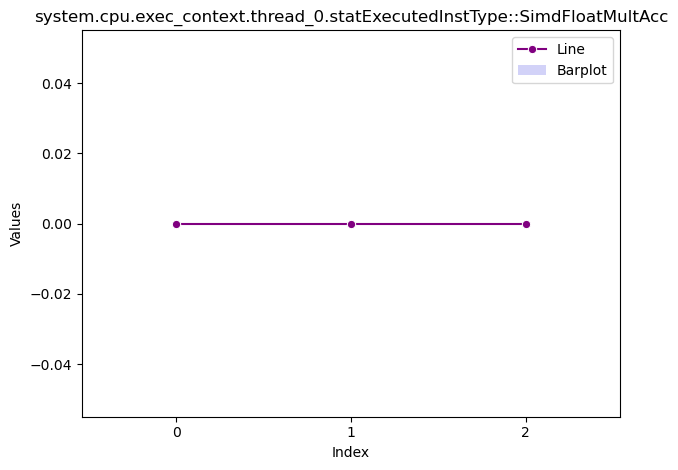

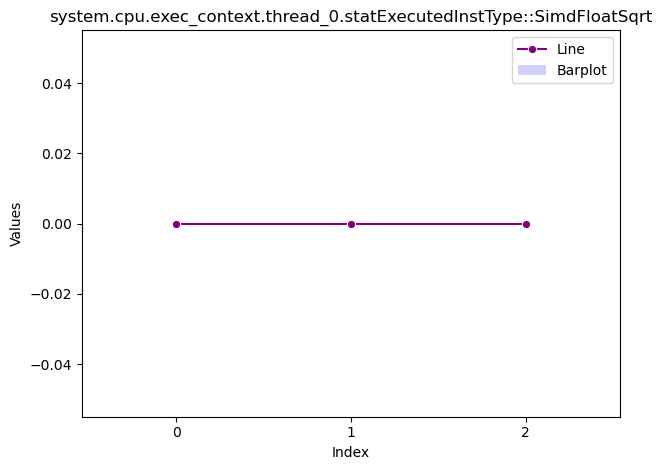

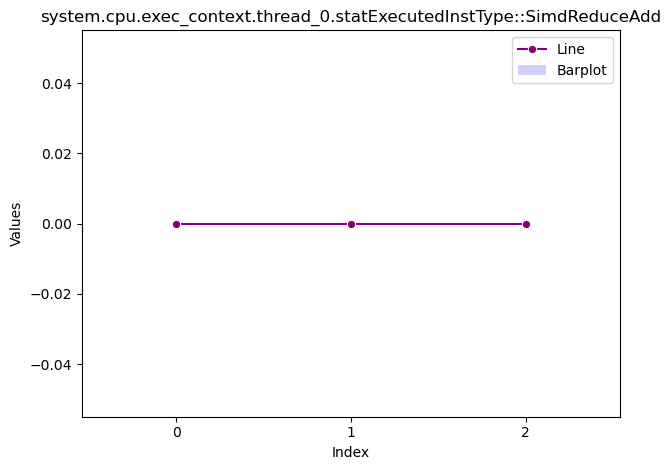

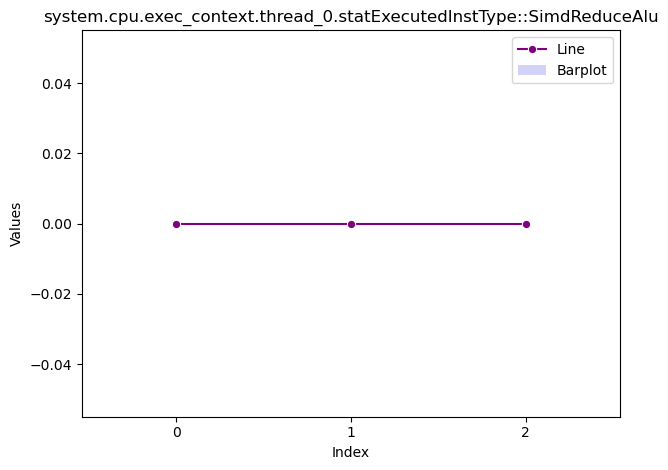

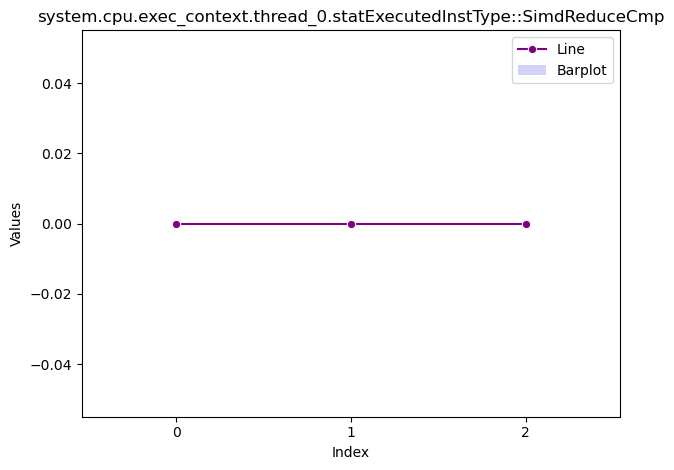

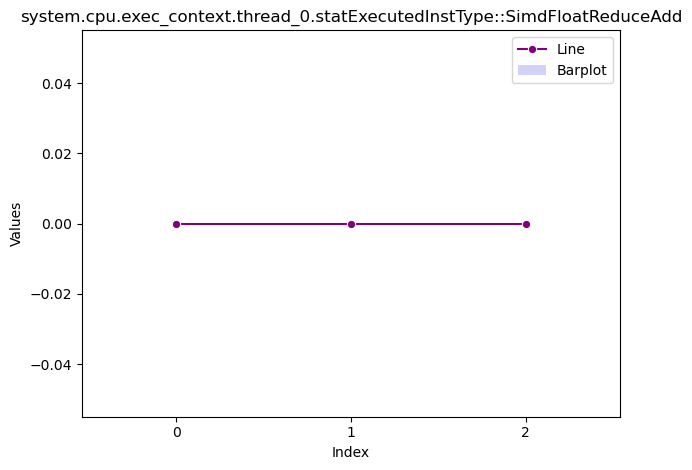

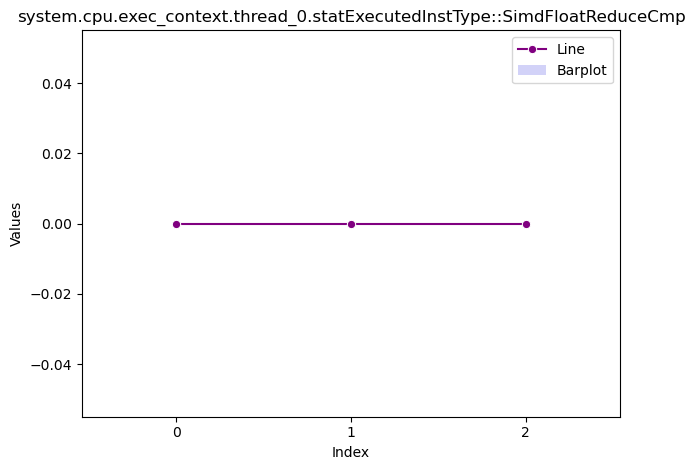

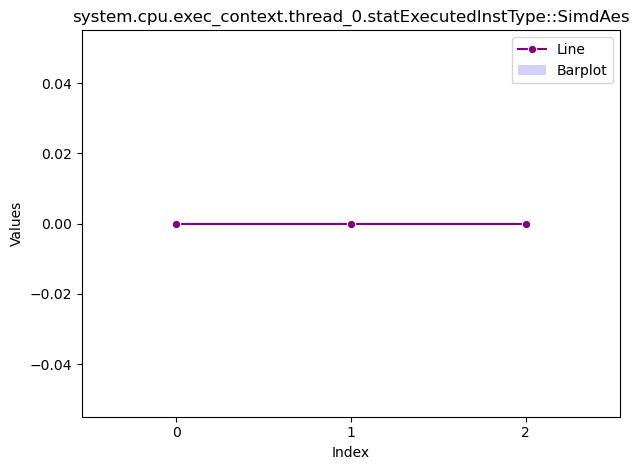

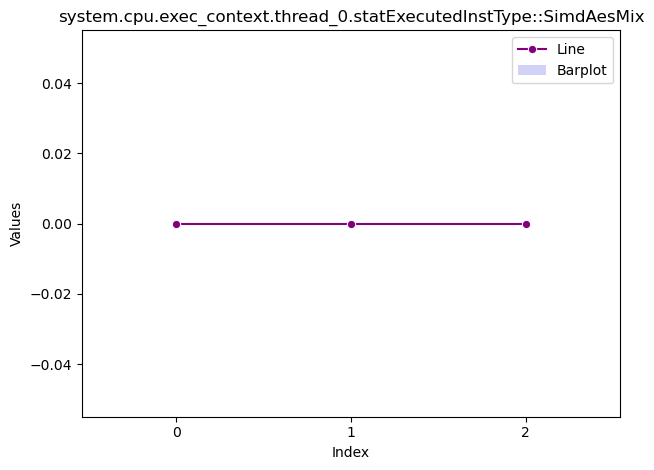

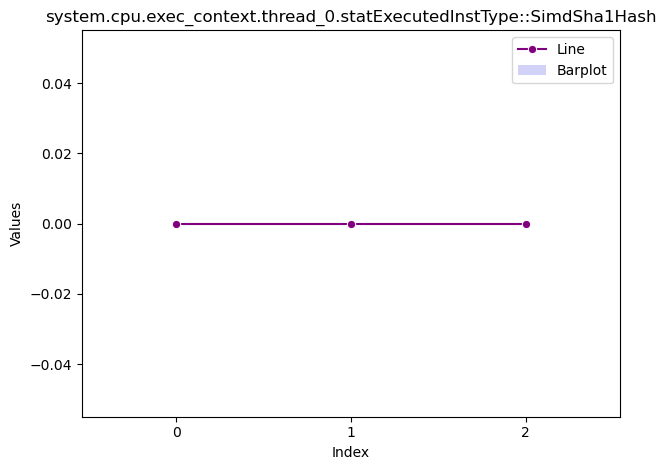

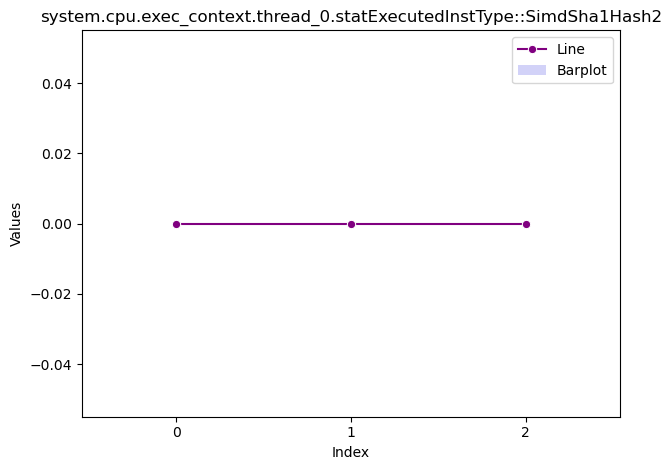

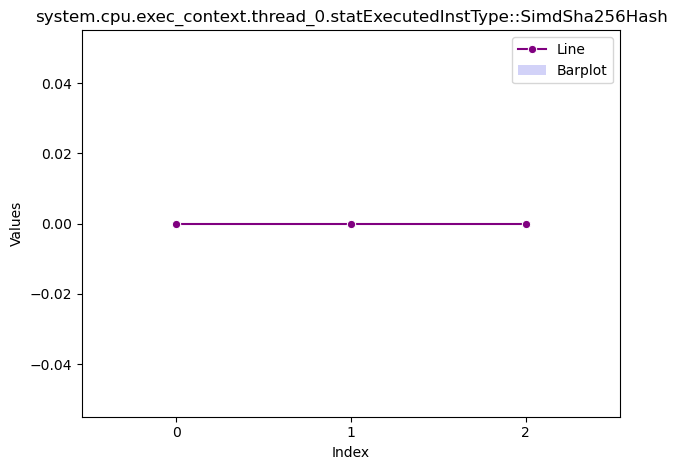

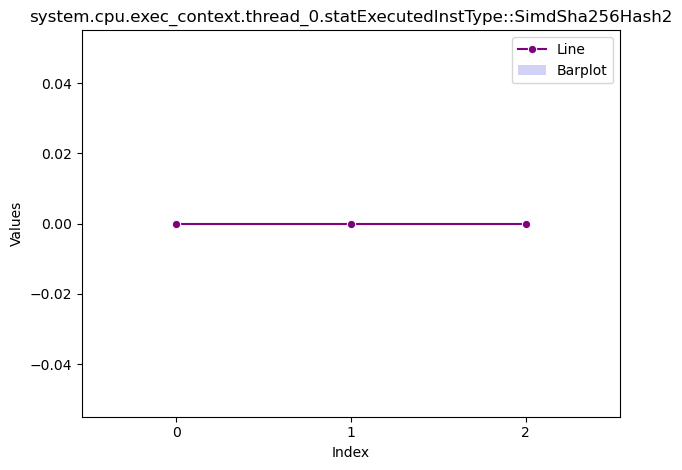

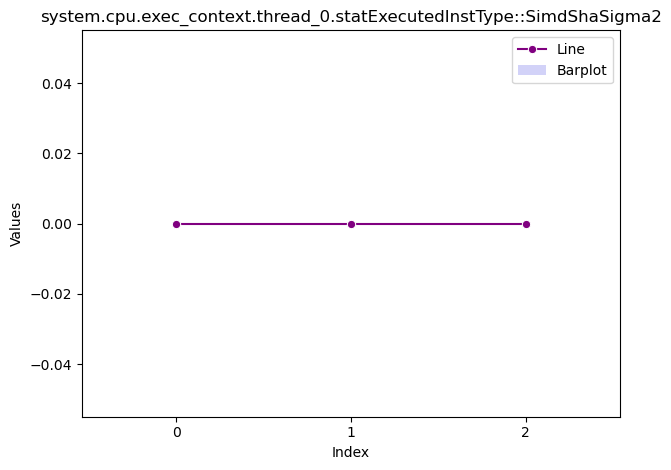

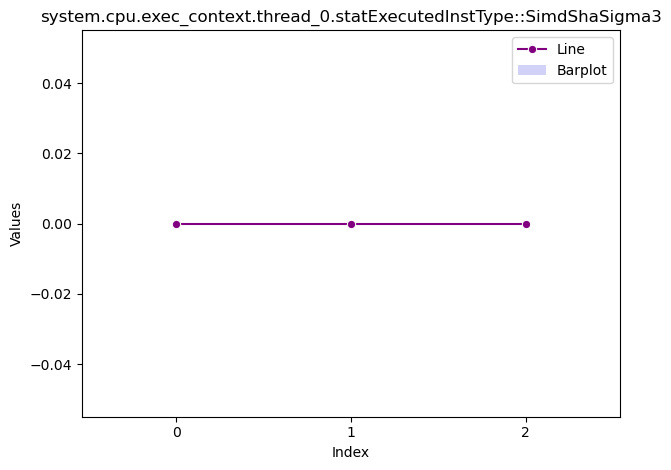

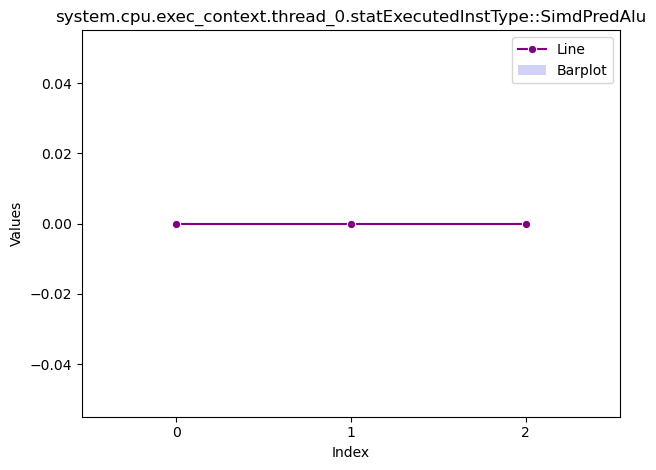

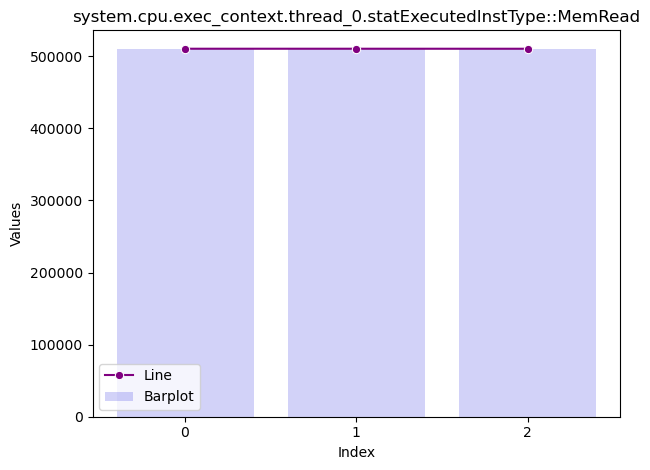

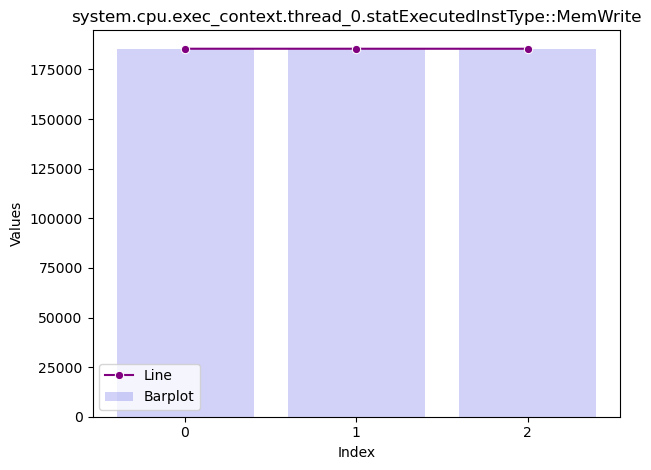

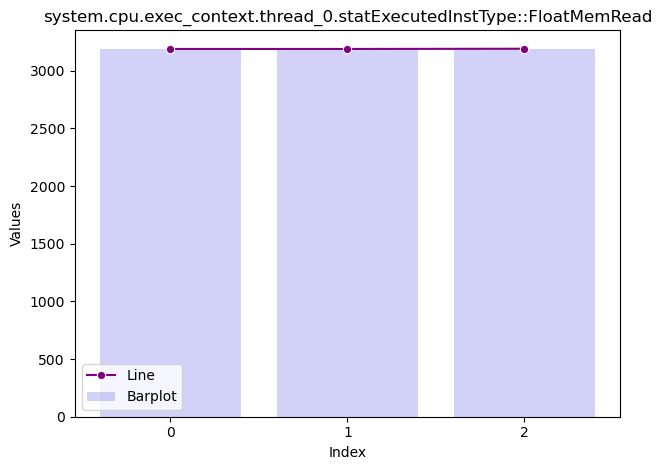

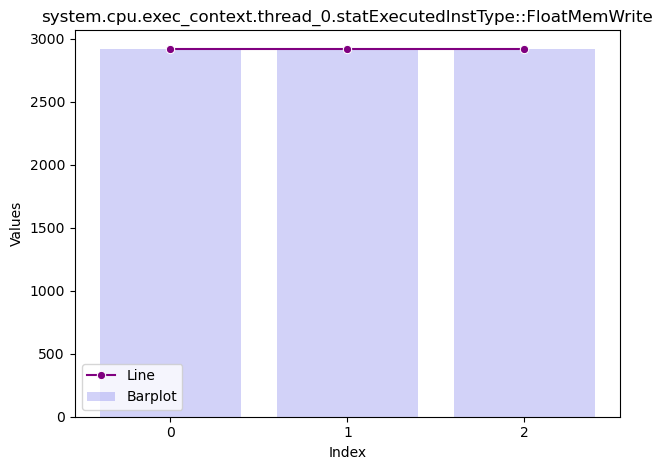

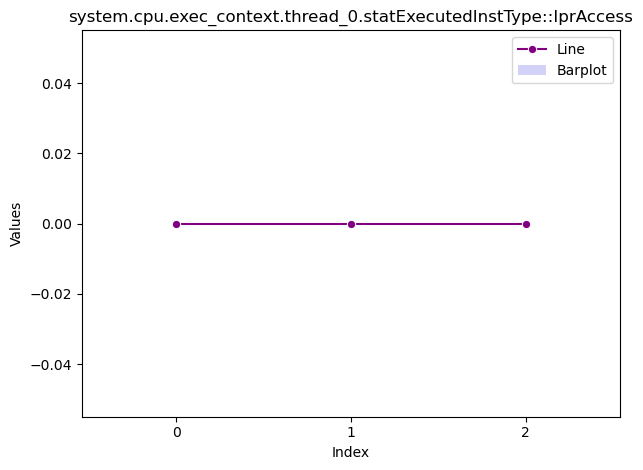

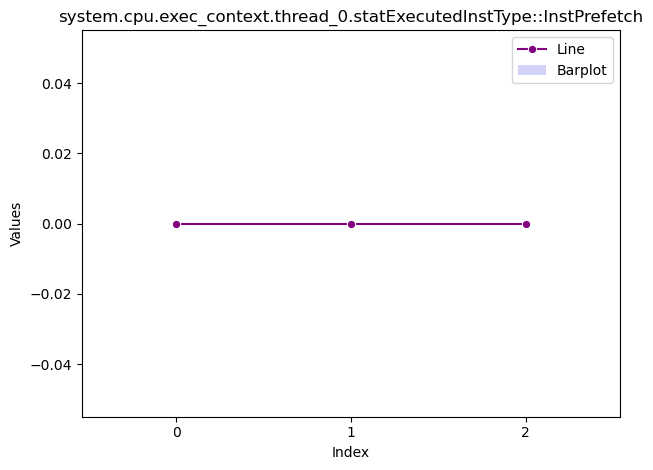

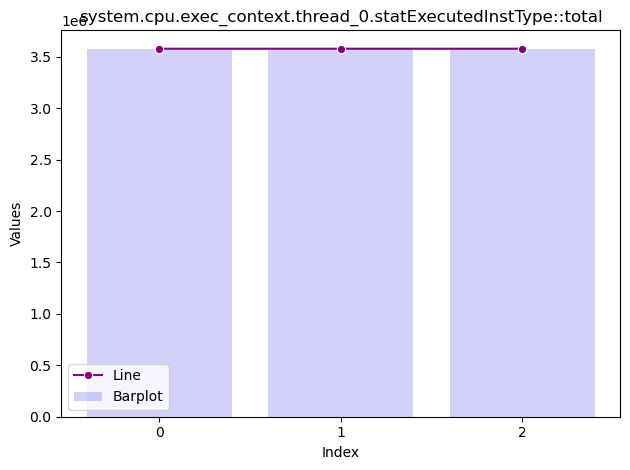

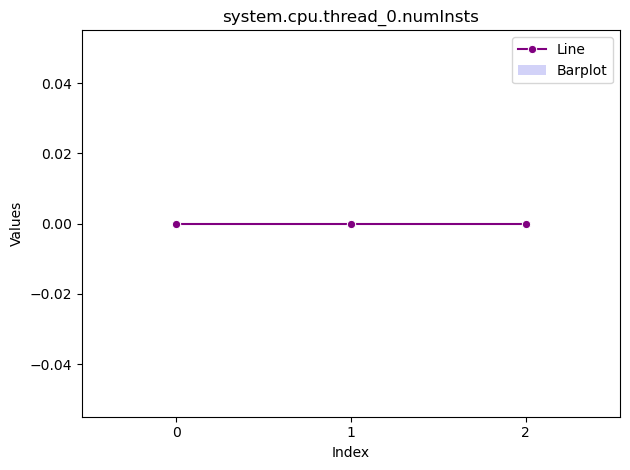

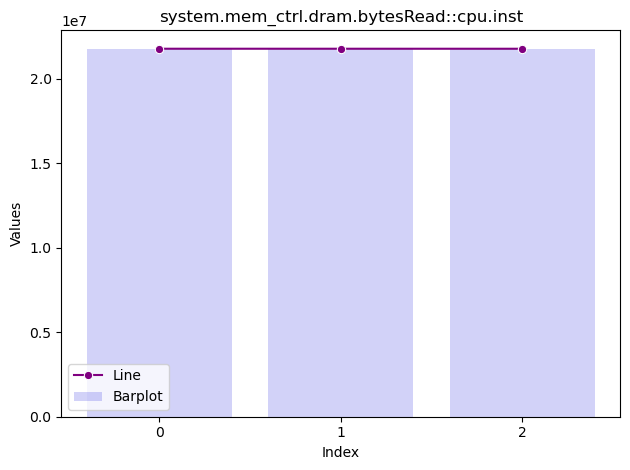

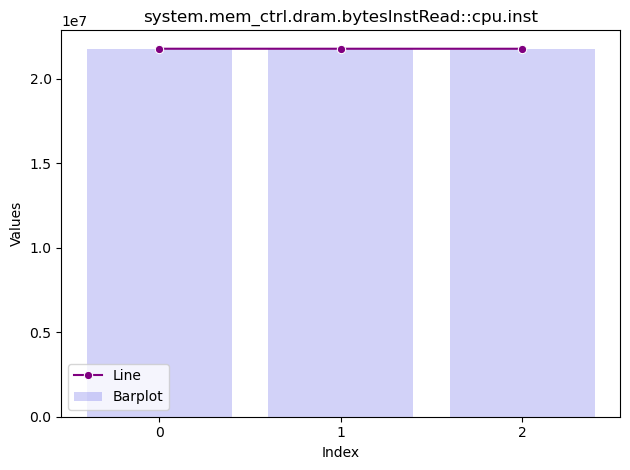

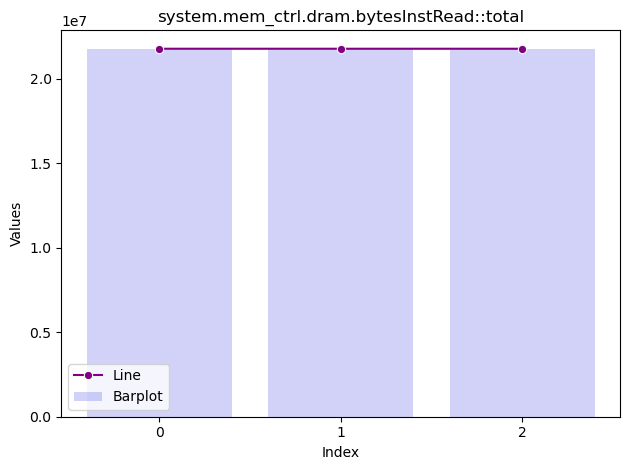

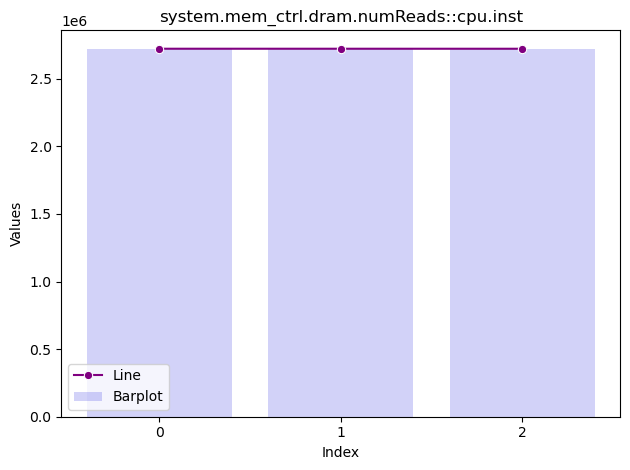

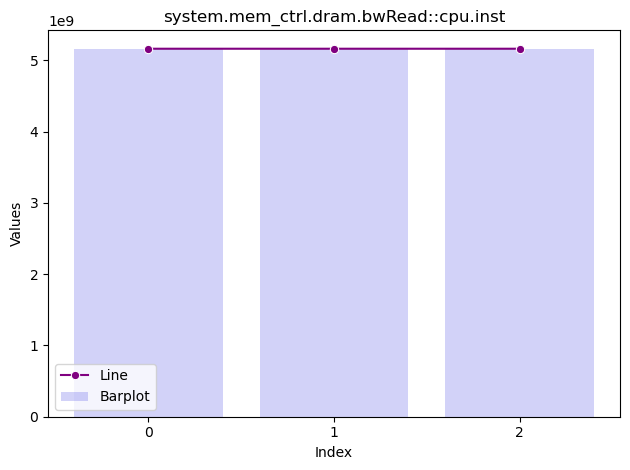

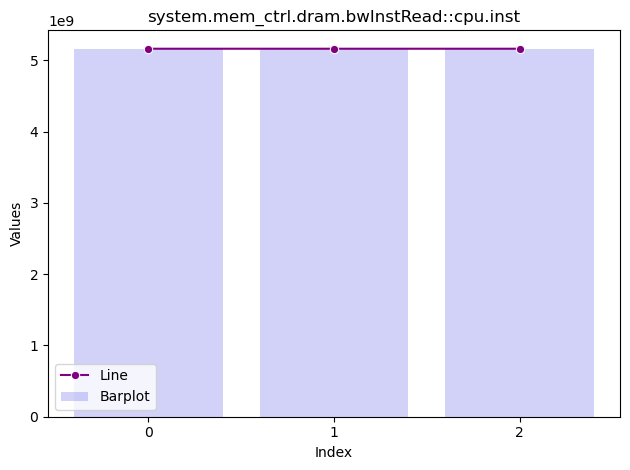

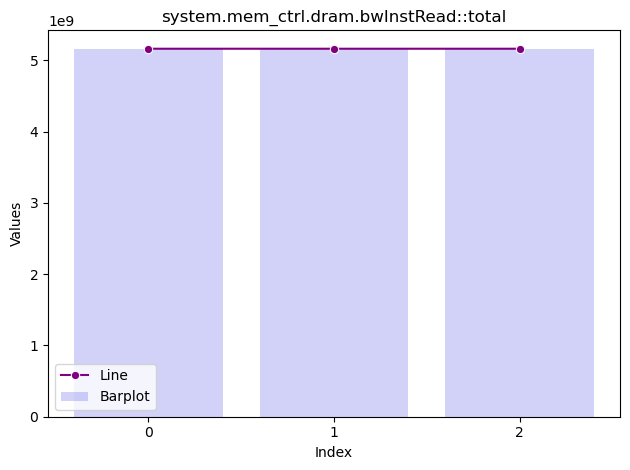

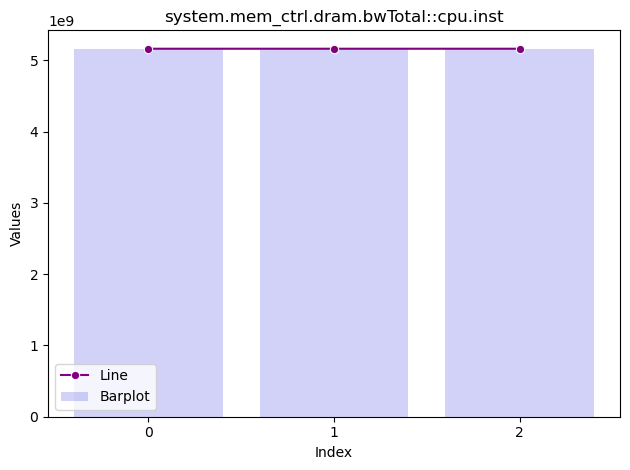

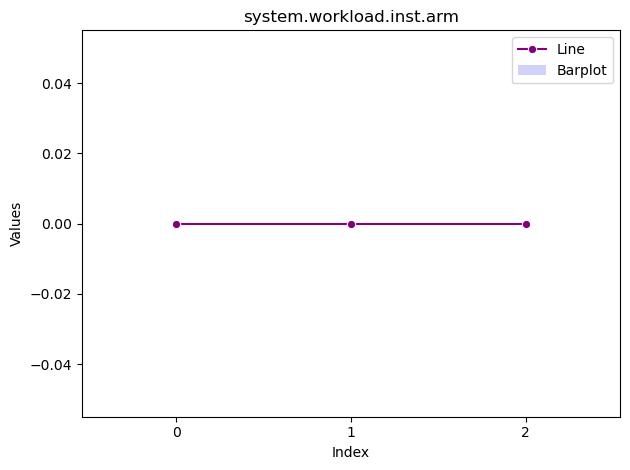

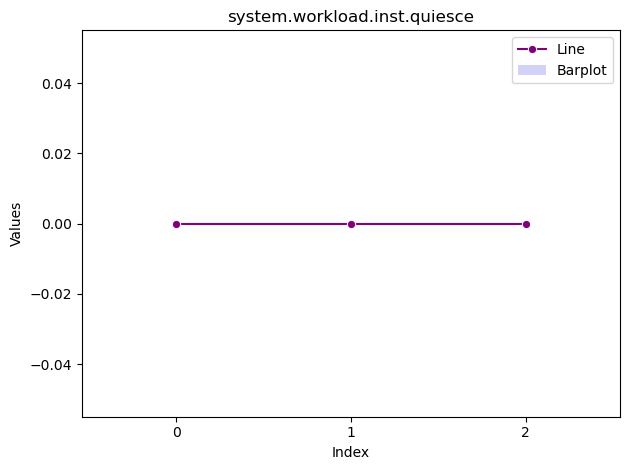

In [371]:
# make tighter layout to avoid having super long page

import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    plt.figure()  
    sns.barplot(x=df.index, y=df[column], color='blue', label = 'Barplot', alpha=0.2)
    sns.lineplot(x=df.index, y=df[column], marker='o', color = 'purple', label = 'Line')
    plt.title(column)  
    plt.xlabel('Index')  
    plt.ylabel('Values')  
    plt.tight_layout()
    plt.show()  